In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)


0.9.0


In [8]:
# reading dataset for weather
dataset = pd.read_csv("austin_weather.csv")
print(dataset.head())
print(dataset.shape)


         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  21-12-2013         74        60        45            67           49   
1  22-12-2013         56        48        39            43           36   
2  23-12-2013         58        45        32            31           27   
3  24-12-2013         61        46        31            36           28   
4  25-12-2013         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  \
0           43                  93                 75                 57   
1           28                  93                 68                 43   
2           23                  76                 52                 27   
3           21                  89                 56                 22   
4           36                  86                 71                 56   

  SeaLevelPressureHighInches SeaLevelPressureAvgInches  \
0                      29.86      

In [4]:
# drop or delete the unnecessary columns in the data. 
clean_data_1 = dataset.drop(['Date', 'SeaLevelPressureHighInches','SeaLevelPressureLowInches'], axis = 1) 
print(clean_data_1)

# some values have 'T' which denotes trace rainfall 
# we need to replace all occurrences of T with 0 
# so that we can use the data in our model 
clean_data_2 = clean_data_1.replace('T', 0.0) 
  
# the data also contains '-' which indicates no  
# or NIL. This means that data is not available 
# we need to replace these values as well. 
clean_data_3 = clean_data_2.replace('-', 0.0) 
print(clean_data_3)


# save the data in a csv file 
clean_data_3.to_csv('austin_final.csv')

      TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF DewPointLowF  \
0            74        60        45            67           49           43   
1            56        48        39            43           36           28   
2            58        45        32            31           27           23   
3            61        46        31            36           28           21   
4            58        50        41            44           40           36   
...         ...       ...       ...           ...          ...          ...   
1314        103        89        75            71           67           61   
1315        105        91        76            71           64           55   
1316        107        92        77            72           64           55   
1317        106        93        79            70           68           63   
1318         99        88        77            66           61           54   

     HumidityHighPercent HumidityAvgPercent Humidit

In [5]:
#converted all data type to float
clean_data_3['DewPointHighF'] = clean_data_3['DewPointHighF'].astype(float)
clean_data_3['DewPointAvgF'] = clean_data_3['DewPointAvgF'].astype(float)
clean_data_3['DewPointLowF'] = clean_data_3['DewPointLowF'].astype(float)
clean_data_3['HumidityHighPercent'] = clean_data_3['HumidityHighPercent'].astype(float)
clean_data_3['HumidityAvgPercent'] = clean_data_3['HumidityAvgPercent'].astype(float)
clean_data_3['HumidityLowPercent'] = clean_data_3['HumidityLowPercent'].astype(float)
clean_data_3['SeaLevelPressureAvgInches'] = clean_data_3['SeaLevelPressureAvgInches'].astype(float)
clean_data_3['VisibilityHighMiles'] = clean_data_3['VisibilityHighMiles'].astype(float)
clean_data_3['VisibilityAvgMiles'] = clean_data_3['VisibilityAvgMiles'].astype(float)
clean_data_3['VisibilityLowMiles'] = clean_data_3['VisibilityLowMiles'].astype(float)
clean_data_3['WindHighMPH'] = clean_data_3['WindHighMPH'].astype(float)
clean_data_3['WindAvgMPH'] = clean_data_3['WindAvgMPH'].astype(float)
clean_data_3['WindGustMPH'] = clean_data_3['WindGustMPH'].astype(float)
clean_data_3['PrecipitationSumInches'] = clean_data_3['PrecipitationSumInches'].astype(float)
print(clean_data_3.dtypes)


TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                float64
DewPointAvgF                 float64
DewPointLowF                 float64
HumidityHighPercent          float64
HumidityAvgPercent           float64
HumidityLowPercent           float64
SeaLevelPressureAvgInches    float64
VisibilityHighMiles          float64
VisibilityAvgMiles           float64
VisibilityLowMiles           float64
WindHighMPH                  float64
WindAvgMPH                   float64
WindGustMPH                  float64
PrecipitationSumInches       float64
dtype: object


In [6]:
#statistical measures of data
stats_value = clean_data_3.describe(include='all')
print(stats_value)
stats_value.to_csv('statsdata.csv')


         TempHighF     TempAvgF     TempLowF  DewPointHighF  DewPointAvgF  \
count  1319.000000  1319.000000  1319.000000    1319.000000   1319.000000   
mean     80.862775    70.642911    59.902957      61.188779     56.332070   
std      14.766523    14.045904    14.190648      14.268932     15.387522   
min      32.000000    29.000000    19.000000       0.000000      0.000000   
25%      72.000000    62.000000    49.000000      52.000000     46.000000   
50%      83.000000    73.000000    63.000000      66.000000     61.000000   
75%      92.000000    83.000000    73.000000      73.000000     69.000000   
max     107.000000    93.000000    81.000000      80.000000     76.000000   

       DewPointLowF  HumidityHighPercent  HumidityAvgPercent  \
count   1319.000000          1319.000000         1319.000000   
mean      50.663381            87.739196           66.570887   
std       16.563451            11.548416           12.721695   
min        0.000000             0.000000          

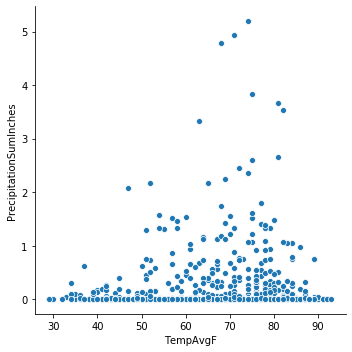

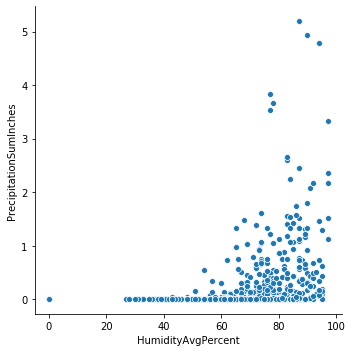

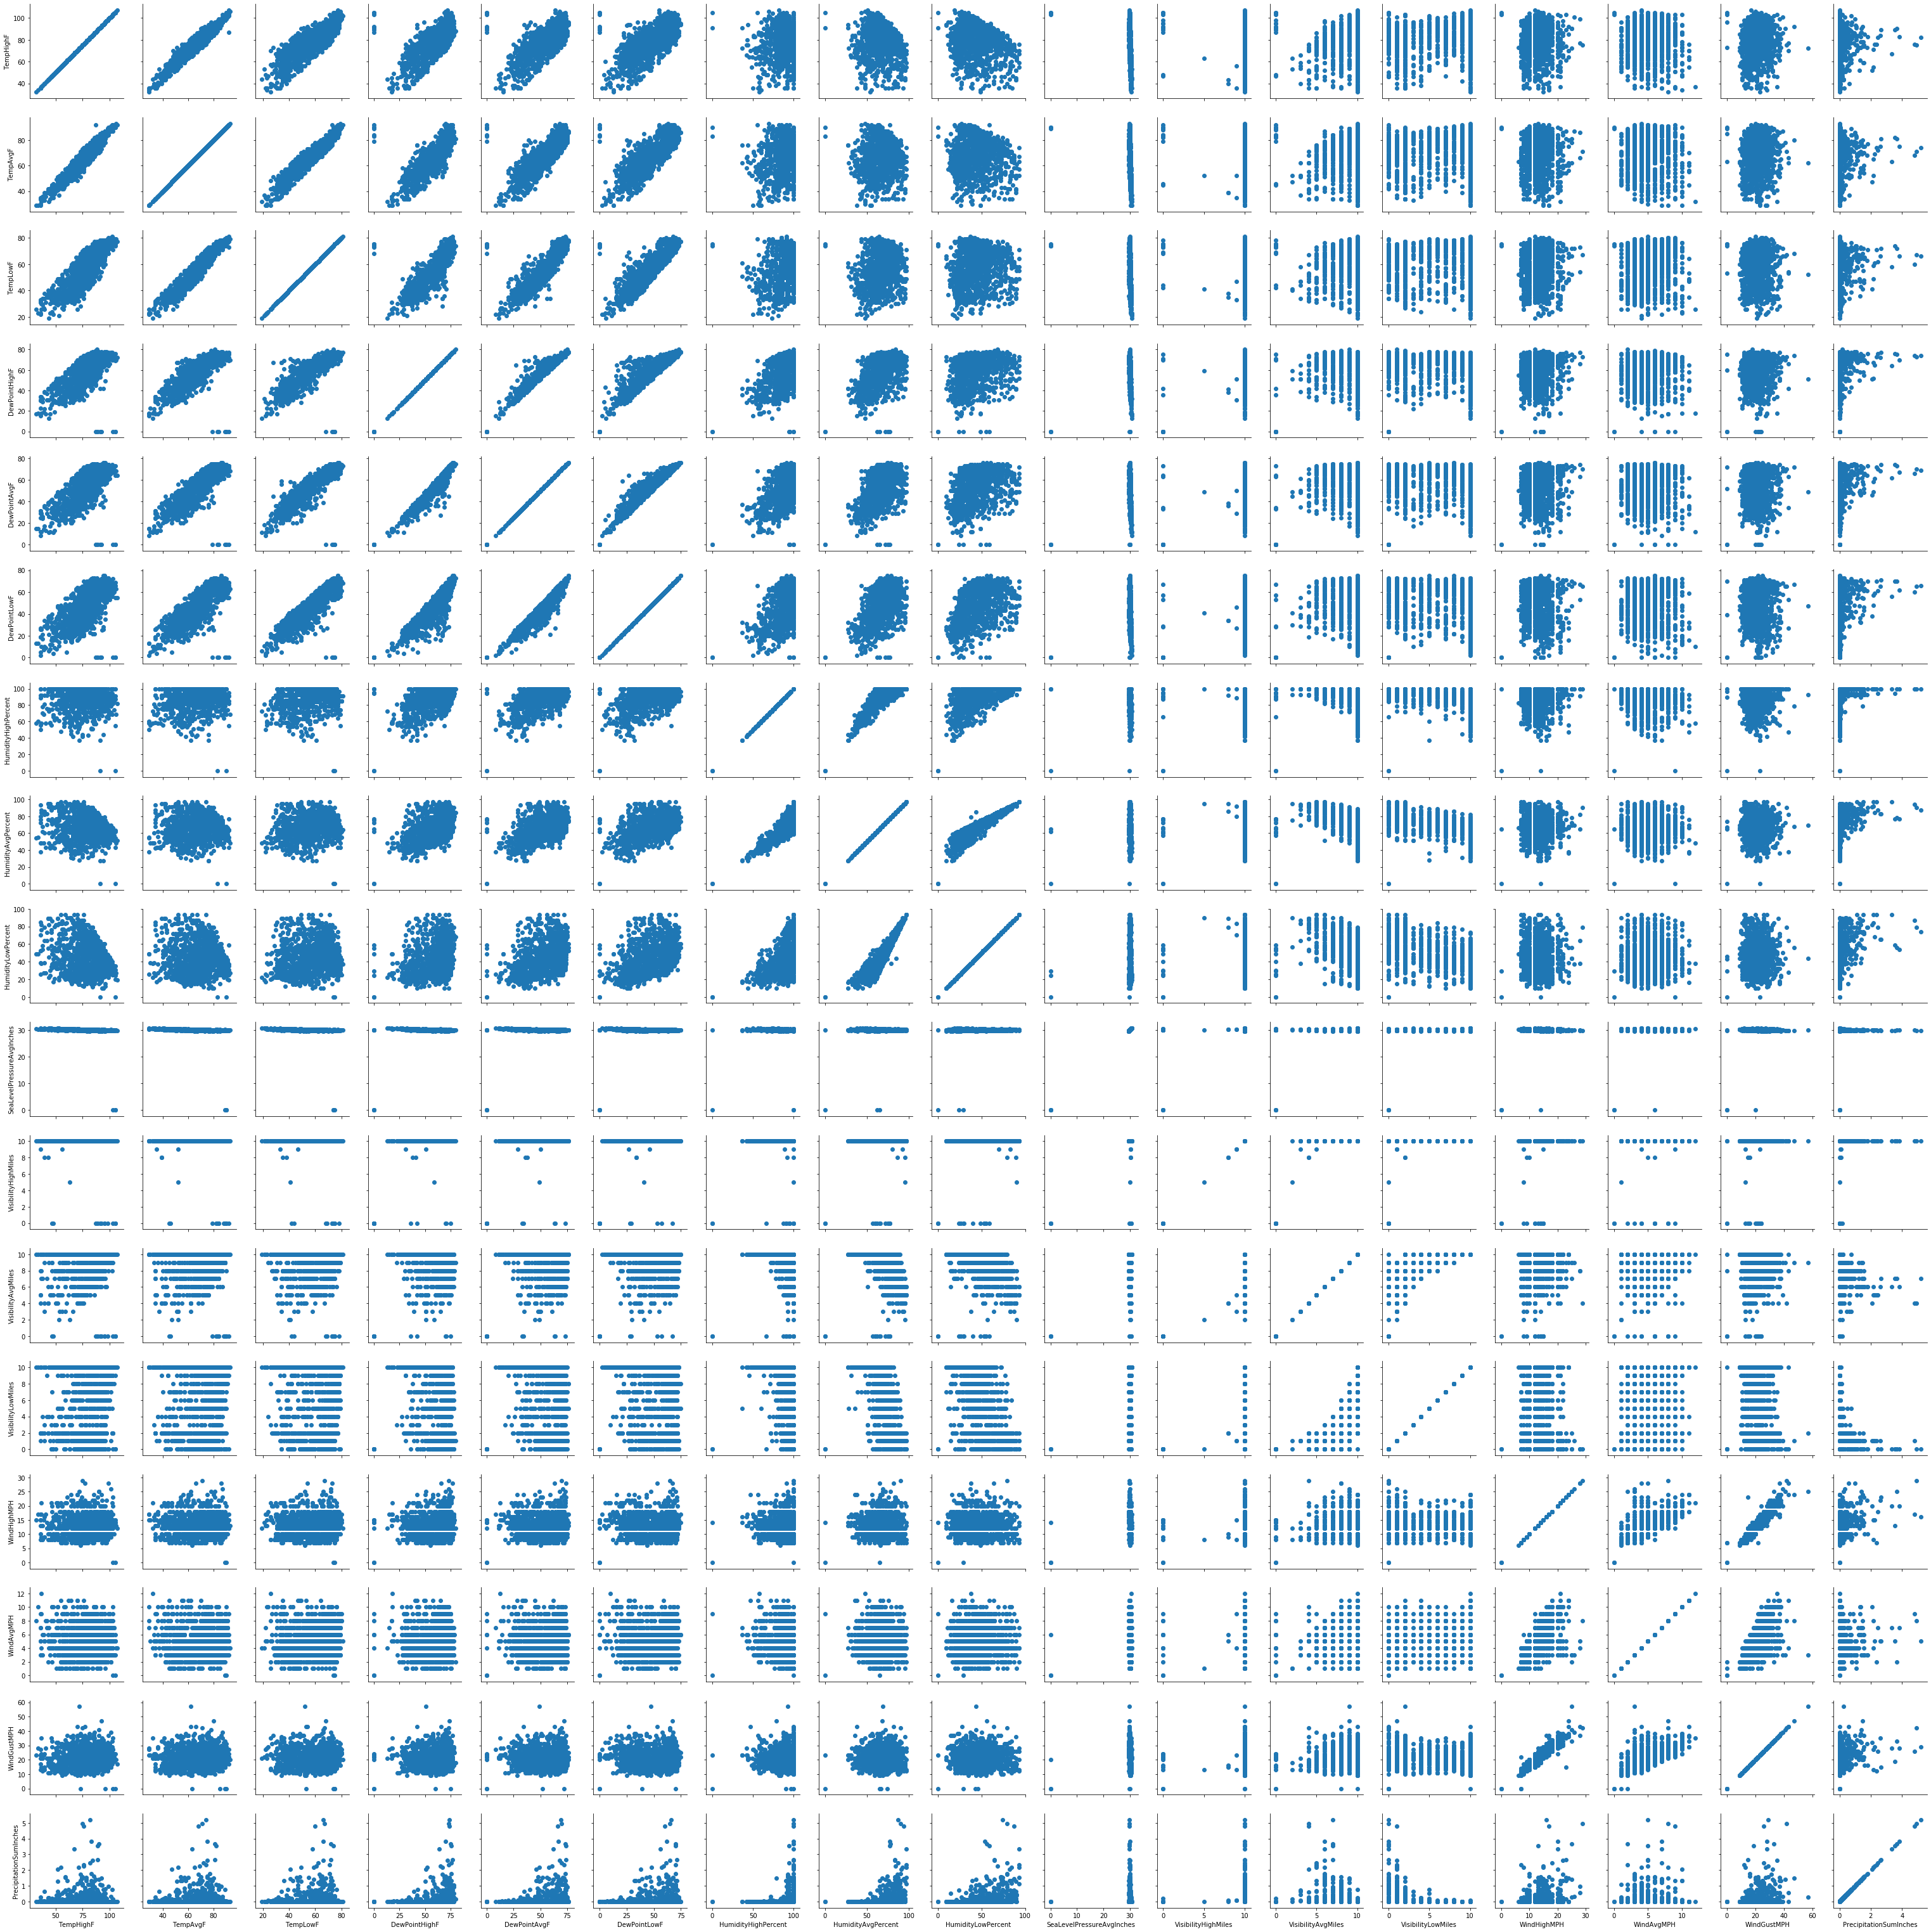

In [7]:
#plot
sns.relplot(x='TempAvgF',y='PrecipitationSumInches',data=clean_data_3)
sns.relplot(x='HumidityAvgPercent',y='PrecipitationSumInches',data=clean_data_3)
#for all the plots uncomment this
all_plot = sns.PairGrid(clean_data_3)
all_plot.map(plt.scatter)
